## Prediction of Cardiovascular Disease

In [2]:
# Import all the required libraries
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from fancyimpute import KNN
from scipy.stats import chi2_contingency
from random import randrange,uniform
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz               
from sklearn.metrics import accuracy_score            
from sklearn.metrics import confusion_matrix           
from sklearn.ensemble import RandomForestClassifier    
import statsmodels.api as sn                           
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.naive_bayes import GaussianNB             
from sklearn import model_selection                  
from sklearn.metrics import classification_report,roc_auc_score,roc_curve 
from sklearn.metrics import classification_report      
import pickle                                        
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant
np.random.seed(123) 
pd.options.mode.chained_assignment = None

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


In [3]:
uploaded=files.upload()

Saving cardio_train.csv to cardio_train.csv


In [4]:
# read the dataset
df=pd.read_csv("cardio_train.csv",sep=';')

In [5]:
# dimensions of the dataset
df.shape

(70000, 13)

In [6]:
# check missing values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Drop the id coloumn as it has no use.
df = df.drop('id', axis = 1)

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


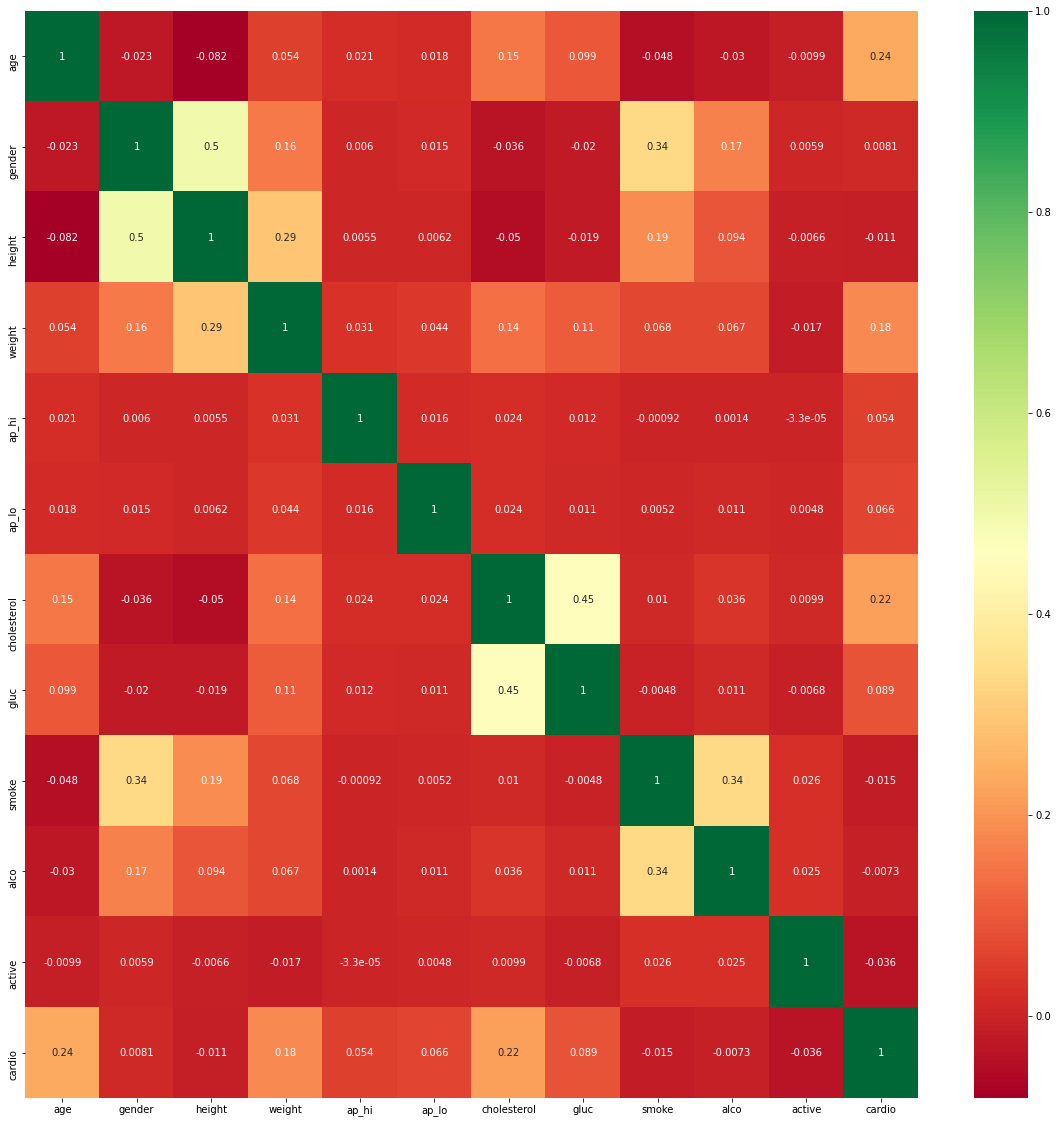

In [10]:
# Find correlation of each feature present in the dataset.
corr_mat=df.corr()
corr_features=corr_mat.index
plt.figure(figsize=(20,20))
mat=sns.heatmap(df[corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


**Percentage of people with or without cardiovascular disease**

In [11]:
count_No_Disease = len(df[df.cardio == 0])
count_Have_Disease = len(df[df.cardio == 1])
print("Percentage of people not having cardiovascular disease are: {:.2f}%".format((count_No_Disease / (len(df.cardio))*100)))
print("Percentage of people having cardiovascular disease are: {:.2f}%".format((count_Have_Disease / (len(df.cardio))*100)))

Percentage of people not having cardiovascular disease are: 50.03%
Percentage of people having cardiovascular disease are: 49.97%


0    35021
1    34979
Name: cardio, dtype: int64


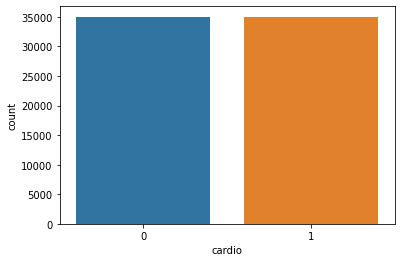

In [12]:
y = df["cardio"]
sns.countplot(y)
target_temp = df.cardio.value_counts()
print(target_temp)

**Percentage of people with or without cardiovascular disease on the basis of gender**

In [13]:
count_women = len(df[df.gender == 1])
count_men = len(df[df.gender == 2])
print("Percentage of female paients are:{:.2f}%".format((count_women)/(len(df.gender))*100))
print("Percentage of male patients are:{:.2f}%".format((count_men)/(len(df.gender))*100))

Percentage of female paients are:65.04%
Percentage of male patients are:34.96%


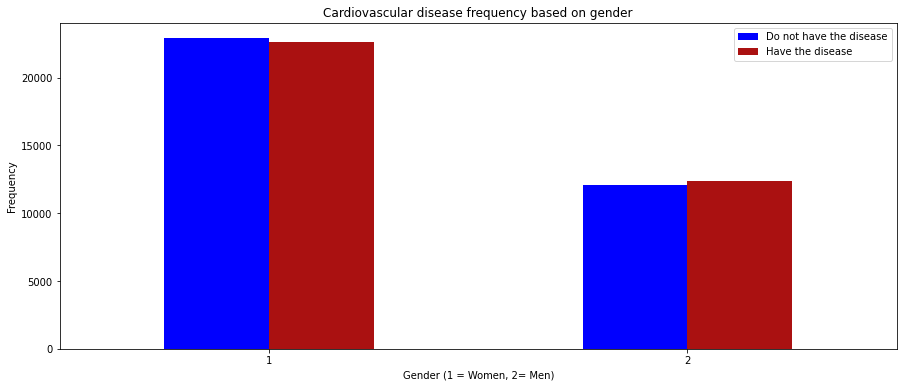

In [14]:
pd.crosstab(df.gender,df.cardio).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Cardiovascular disease frequency based on gender')
plt.xlabel('Gender (1 = Women, 2= Men)')
plt.xticks(rotation=0)
plt.legend(["Do not have the disease", "Have the disease"])
plt.ylabel('Frequency')
plt.show()

**Systolic Blood Pressure vs Cholesterol**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


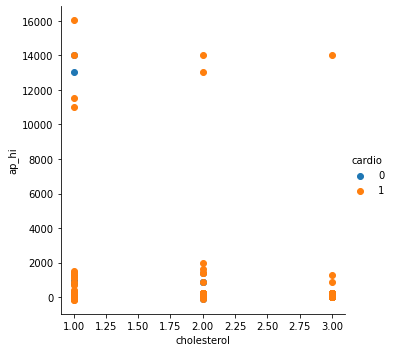

In [16]:
sns.FacetGrid(df,hue="cardio",size=5).map(plt.scatter,"cholesterol","ap_hi").add_legend();
plt.show()

**Diastolic Blood Pressure vs Cholesterol**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


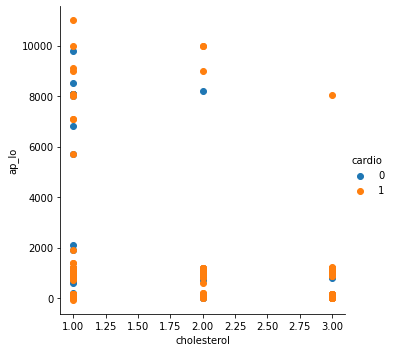

In [17]:
sns.FacetGrid(df,hue="cardio",size=5).map(plt.scatter,"cholesterol","ap_lo").add_legend();
plt.show()

**Glucose level vs Systolic Blood Pressure**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


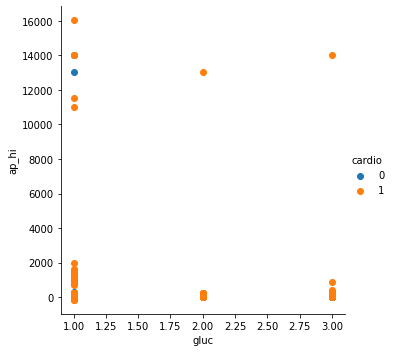

In [18]:
sns.FacetGrid(df,hue="cardio",size=5).map(plt.scatter,"gluc","ap_hi").add_legend();
plt.show()

**Glucose level vs Diastolic Blood Pressure**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


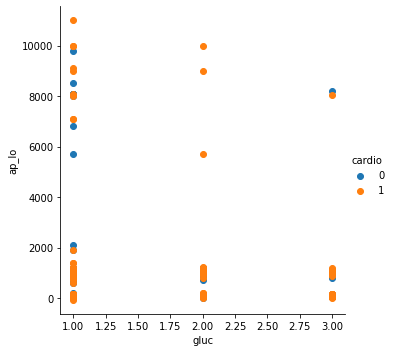

In [19]:
sns.FacetGrid(df,hue="cardio",size=5).map(plt.scatter,"gluc","ap_lo").add_legend();
plt.show()

**Cardiovascular Disease frequency based on the cholesterol level**

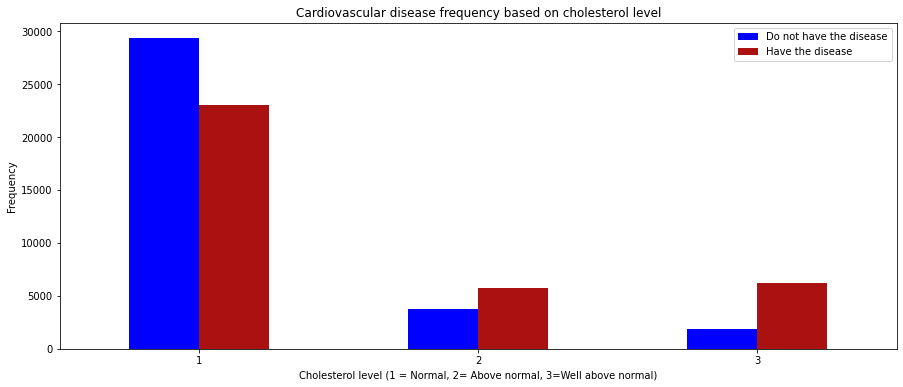

In [20]:
pd.crosstab(df.cholesterol,df.cardio).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Cardiovascular disease frequency based on cholesterol level')
plt.xlabel('Cholesterol level (1 = Normal, 2= Above normal, 3=Well above normal)')
plt.xticks(rotation=0)
plt.legend(["Do not have the disease", "Have the disease"])
plt.ylabel('Frequency')
plt.show()

**Cardiovascular Disease frequency based on the glucose level**

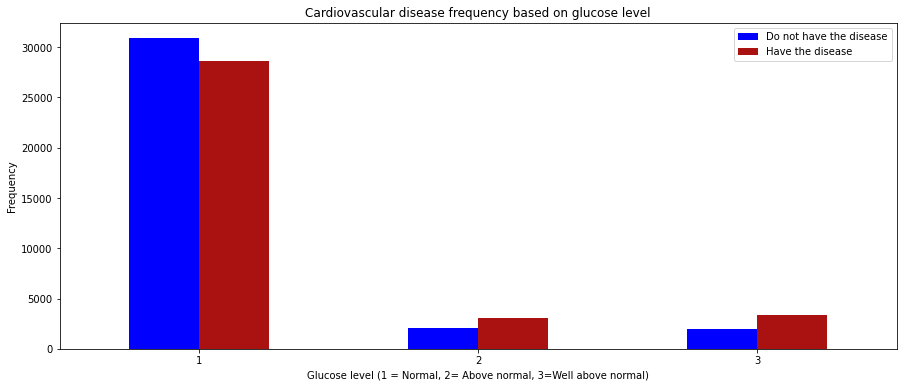

In [21]:
pd.crosstab(df.gluc,df.cardio).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Cardiovascular disease frequency based on glucose level')
plt.xlabel('Glucose level (1 = Normal, 2= Above normal, 3=Well above normal)')
plt.xticks(rotation=0)
plt.legend(["Do not have the disease", "Have the disease"])
plt.ylabel('Frequency')
plt.show()

**Splitting the dataset into train-test**

In [23]:
predictors = df.drop("cardio",axis=1)
target = df["cardio"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [26]:
X_train.shape

(56000, 11)

In [27]:
X_test.shape

(14000, 11)

In [28]:
Y_train.shape

(56000,)

In [29]:
Y_test.shape

(14000,)

**Applying different ML algorithms**

**1. KNN (K Nearest Neighbors)**

In [60]:
# for neighbors=8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [61]:
Y_pred_knn.shape

(14000,)

In [62]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN for 8 neighbors is: "+str(score_knn)+" %")

The accuracy score achieved using KNN for 8 neighbors is: 69.1 %


In [63]:
# for neighbors=4
knn_model=KNeighborsClassifier(n_neighbors=4).fit(X_train,Y_train)
knn_predictions=knn_model.predict(X_test)

In [64]:
# Build the confusion matrix
CM=pd.crosstab(Y_test,knn_predictions)
CM

col_0,0,1
cardio,,
0,5622,1447
1,3233,3698


In [65]:
# For K=1 upto K=25 record the testing accuracy
k_range = range(1, 26)

# Create Python dictionary using [] or dict()
scores = []
from sklearn import metrics
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, Y_pred))

print(scores)

[0.6240714285714286, 0.6286428571428572, 0.6642142857142858, 0.6657142857142857, 0.6790714285714285, 0.6812857142857143, 0.6855714285714286, 0.691, 0.6926428571428571, 0.6972142857142857, 0.6977142857142857, 0.7005, 0.7035, 0.7037857142857142, 0.7047857142857142, 0.7046428571428571, 0.7088571428571429, 0.7091428571428572, 0.7085, 0.7091428571428572, 0.7073571428571429, 0.7087142857142857, 0.7089285714285715, 0.7091428571428572, 0.7101428571428572]


In [66]:
# Save the value of TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [67]:
# Check the accuracy of the model for neighbors=4
score_knn_4=((TP+TN)*100)/(TP+TN+FP+FN)
score_knn_4

66.57142857142857

In [68]:
# Check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

46.64550569903333

**2. Logistic Regression**

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [70]:
Y_pred_lr.shape

(14000,)

In [71]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 69.69 %


**3. Naive Bayes**

In [72]:
nb = GaussianNB()
Y_train=Y_train.astype('int')
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [73]:
Y_pred_nb.shape

(14000,)

In [74]:
# Build the confusion matrix
CM=pd.crosstab(Y_test,Y_pred_nb)
CM

col_0,0,1
cardio,,
0,6339,730
1,5031,1900


In [75]:
# Save the value of TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [76]:
# Check the accuracy of the model
score_nb=((TP+TN)*100)/(TP+TN+FP+FN)
score_nb

58.85

In [77]:
# Check the false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

72.58692829317559

**4. Decision Trees**

In [78]:
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
# Predict the new test cases
C50_Predictions = C50_model.predict(X_test)

In [79]:
# Confusion matrix of decision tree
CM = pd.crosstab(Y_test, C50_Predictions)
CM

col_0,0,1
cardio,,
0,4507,2562
1,2576,4355


In [80]:
# Save the value of TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [81]:
# Check the accuracy of the model
score_dt=((TP+TN)*100)/(TP+TN+FP+FN)
score_dt

63.3

In [82]:
# Check the false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

37.16635406146299

**Comparison of all the models**

In [83]:
scores = [score_knn,score_lr,score_nb,score_dt]
algorithms = ["K-Nearest Neighbors","Logistic Regression","Naive Bayes","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using K-Nearest Neighbors is: 69.1 %
The accuracy score achieved using Logistic Regression is: 69.69 %
The accuracy score achieved using Naive Bayes is: 58.85 %
The accuracy score achieved using Decision Tree is: 63.3 %


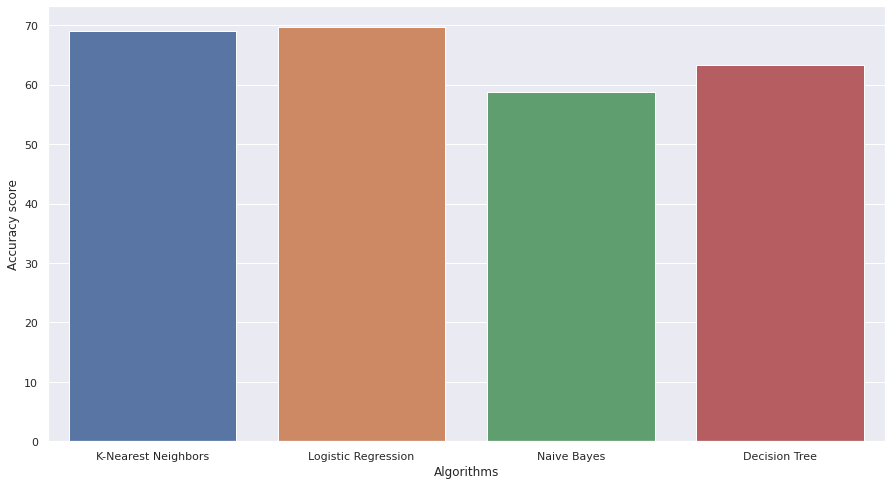

In [84]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)